In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [2]:
# Loading the dataset
data= pd.read_csv("heart_disease.csv")

In [3]:
# displaying the top 5 rows of the data
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
# getting the shape of the data
data.shape

(319795, 18)

In [5]:
# Checking for null values
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [6]:
# dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
# descriptive summary of data
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [8]:
# Getting the column names
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

# Exploratory Data Analysis

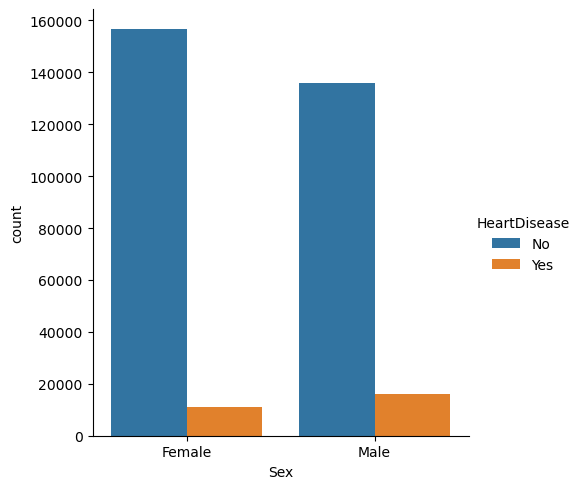

In [9]:
# Let us figure out gender-wise distribution of heart disease data among participants 

sns.catplot(x="Sex", kind="count",hue='HeartDisease', data=data)

##### form the graph it can be inferred the count of heart diseases is more for males than females

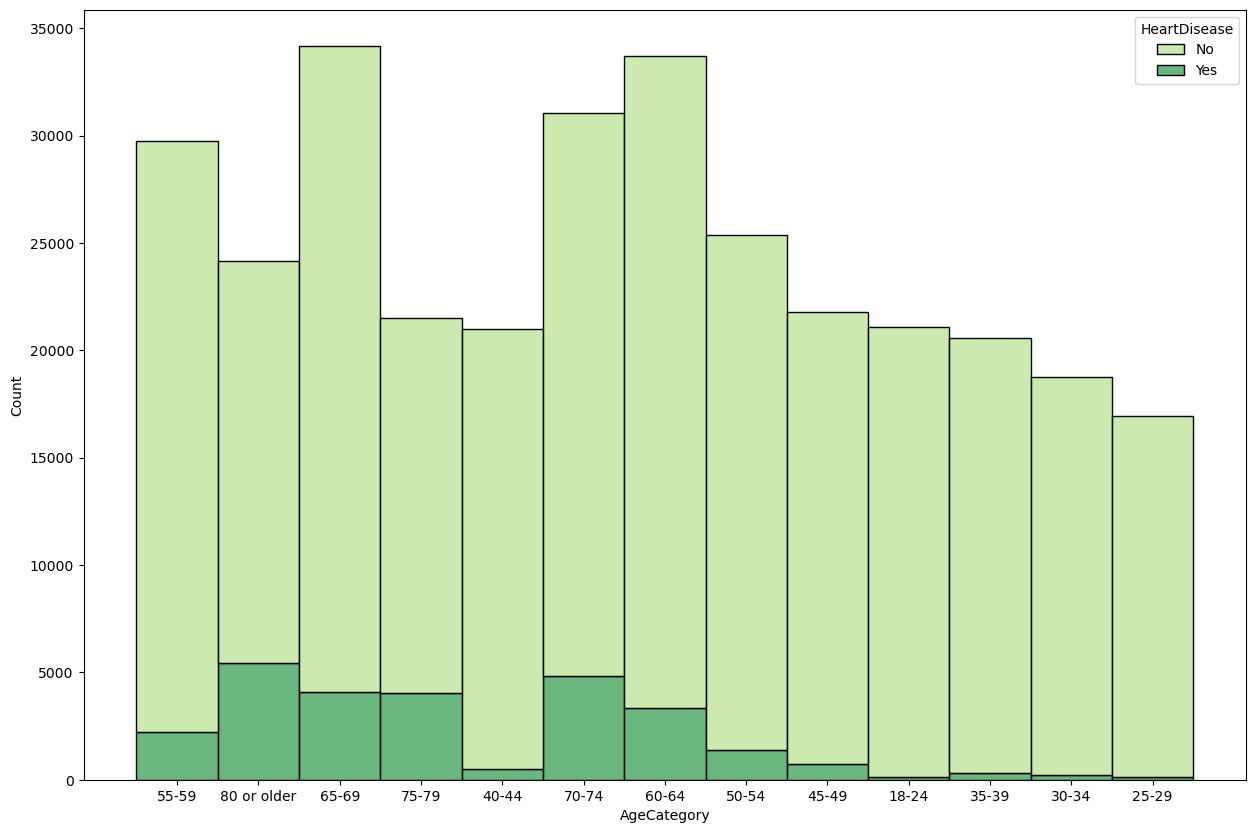

In [10]:
# Heart Disease in different age groups

plt.figure(figsize=(15,10))
sns.histplot(x='AgeCategory', data=data, hue='HeartDisease', multiple='stack',palette='YlGn')
plt.show()

##### Heart disease is higher in people above the age of 60 years

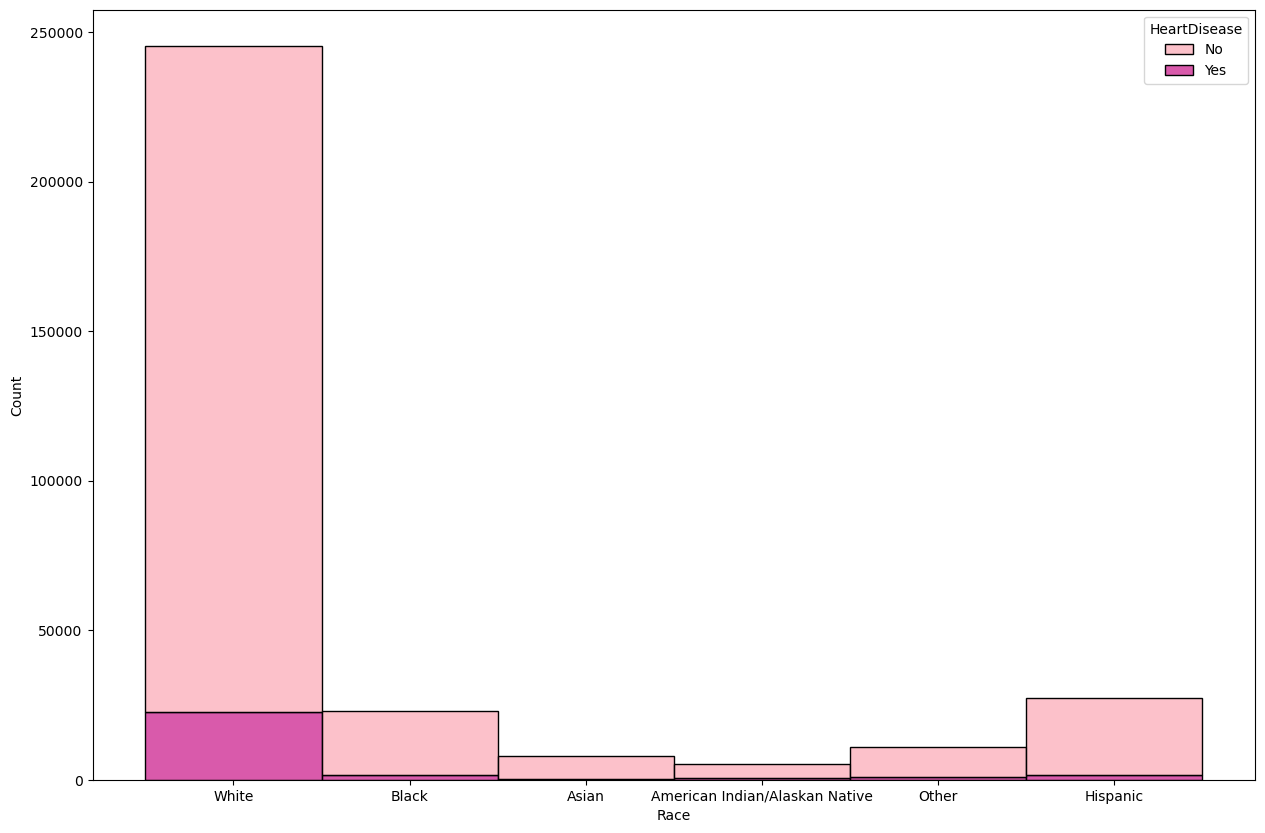

In [11]:
plt.figure(figsize=(15,10))
sns.histplot(x='Race', data=data, hue='HeartDisease', multiple='stack', palette='RdPu')
plt.show()

##### heart disease is more in Whites

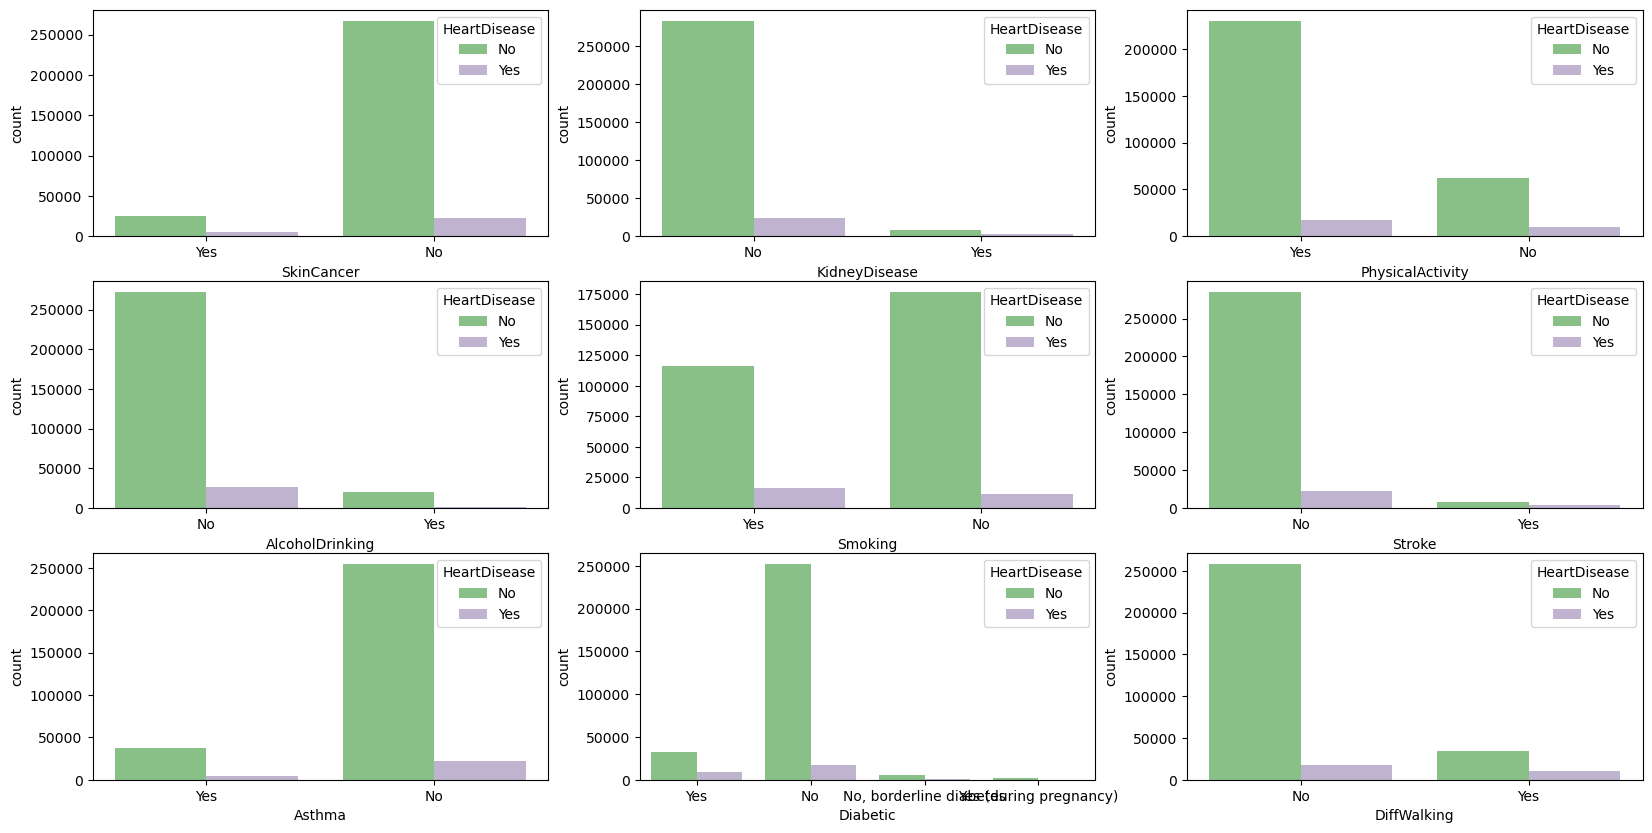

In [12]:
# analysing categorical columns to know which features have impact on heartdisease
x_axis=['SkinCancer', 'KidneyDisease', 'PhysicalActivity', 'AlcoholDrinking', 'Smoking', 'Stroke', 'Asthma', 'Diabetic', 'DiffWalking']

fig=plt.figure(figsize=(20,10))

for i in range(0,len(x_axis)):
    sub_plot=fig.add_subplot(3,3,i+1)
    plot_map=sns.countplot(data=data,x=x_axis[i],hue='HeartDisease',palette='Accent')


##### From all the graphs presented, it can be concluded that alcohol consumption and smoking are not the main factors in heart disease, as scientists testify to this.

# Data Pre-Processing

In [13]:
# Machine Learning Readiness of data
# dataset does have many categorical variables. Therefore, we will rearrange the columns.

df=data[['Race', 'AgeCategory', 'GenHealth','Sex','Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity','Asthma', 'KidneyDisease', 'SkinCancer','BMI', 'SleepTime', 'PhysicalHealth', 'MentalHealth', 'HeartDisease']]

In [14]:
#Let us understand more about different columns using unique values

for i in df.columns:
    print(f'Unique Values of {i.title()}: {df[i].unique()}')

Unique Values of Race: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Unique Values of Agecategory: ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Unique Values of Genhealth: ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Unique Values of Sex: ['Female' 'Male']
Unique Values of Smoking: ['Yes' 'No']
Unique Values of Alcoholdrinking: ['No' 'Yes']
Unique Values of Stroke: ['No' 'Yes']
Unique Values of Diffwalking: ['No' 'Yes']
Unique Values of Diabetic: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
Unique Values of Physicalactivity: ['Yes' 'No']
Unique Values of Asthma: ['Yes' 'No']
Unique Values of Kidneydisease: ['No' 'Yes']
Unique Values of Skincancer: ['Yes' 'No']
Unique Values of Bmi: [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Unique Values of Sleeptime: [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
Unique Values of P

In [15]:
# Replacing the value "No, borderline diabetes", as "Yes"
data=data.replace(to_replace ="No, borderline diabetes", value ="Yes")
# Replacing the value "Yes (during pregnancy)", as "No"
data=data.replace(to_replace ="Yes (during pregnancy)", value ="No")

In [16]:
# converting the values of specific categorical variables in the df DataFrame into binary numerical representations (0 and 1)
categorical_var=['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer', 'HeartDisease']

for i in categorical_var:
    df[i]=data[i].apply(lambda x: 0 if x=='No'else 1).astype('int64')


In [17]:
# using lambda function to convert Female as 1 and male as 0 in sex column
df['Sex']=df['Sex'].apply(lambda x: 0 if x=='Female'else 1).astype('int64')

In [18]:
# Extract features (X) by dropping the target column
X=df.iloc[:,:-1].values
# Extract features (Y) by dropping the rest except for the target column
Y=df.iloc[:,-1:].values

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# using OneHotEncoder to convert categorical values into binary matirx of numerical values for 'Race', 'AgeCategory' and 'GenHealth' columns which are at index 0,1,2 in the df

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [20]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=42) 

In [21]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train[:,-4:]= sc.fit_transform(X_train[:, -4:])
X_test[:,-4:]= sc.transform(X_test[:, -4:])

In [22]:
# Now we will implement model pipeline guidelines and replicate above models and learn about best model
# amongst these classifiers

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

model_pipeline=[]
model_pipeline.append(DecisionTreeClassifier(random_state=41))
model_pipeline.append(LogisticRegression(solver='saga',random_state=42))
model_pipeline.append(MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=100))  # MLP (Neural Network)

In [27]:
model_list=['Decision Tree', 'Logistic Regression','MLP Classifier']
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve
from sklearn import metrics

acc=[]
auc=[]


for name, classifier in zip(model_list, model_pipeline):
    print(f"\nModel: {name}")
    
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    acc.append(accuracy_score(Y_test, Y_pred))
    fpr,tpr,_thresholds=roc_curve(Y_test,Y_pred)
    auc.append(round(metrics.auc(fpr,tpr),2))
    conf_matrix = confusion_matrix(Y_test, Y_pred)
   
    print("Confusion Matrix:")
    print(conf_matrix)
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(Y_test, Y_pred))


Model: Decision Tree
Confusion Matrix:
[[53770  4597]
 [ 4248  1344]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     58367
           1       0.23      0.24      0.23      5592

    accuracy                           0.86     63959
   macro avg       0.58      0.58      0.58     63959
weighted avg       0.87      0.86      0.86     63959


Model: Logistic Regression
Confusion Matrix:
[[57897   470]
 [ 5036   556]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.54      0.10      0.17      5592

    accuracy                           0.91     63959
   macro avg       0.73      0.55      0.56     63959
weighted avg       0.89      0.91      0.89     63959


Model: MLP Classifier
Confusion Matrix:
[[57808   559]
 [ 5061   531]]
Classification Report:
              precision    recall  f1-score   support

  

In [28]:
# Accuracy and AUC scores
result=pd.DataFrame({'Model': model_list, 'Accuracy': acc, 'AUC': auc})
result

,Model,Accuracy,AUC
0,Decision Tree,0.861708,0.58
1,Logistic Regression,0.913914,0.55
2,MLP Classifier,0.912131,0.54


In [29]:
# Get the trained Logistic Regression model from the pipeline
log_reg_model = model_pipeline[1]  # Logistic Regression is at index 1

# Use the Logistic Regression model to make predictions on the test set
log_reg_pred = log_reg_model.predict(X_test)

# Print the predictions
print("Predictions using Logistic Regression:")
print(log_reg_pred)

Predictions using Logistic Regression:
[0 0 0 ... 0 0 0]


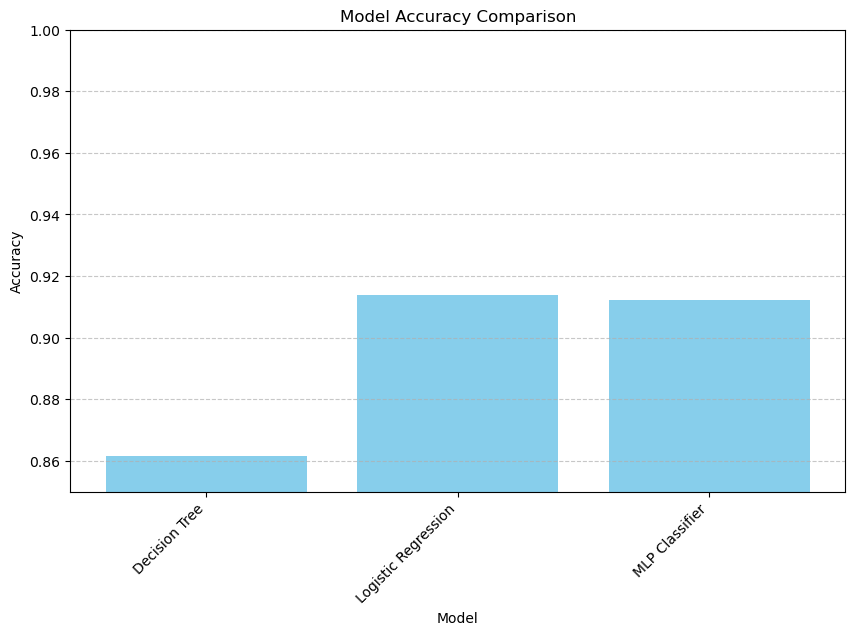

In [30]:
plt.figure(figsize=(10,6))

# Plotting the bar chart for Accuracy
plt.bar(result['Model'], result['Accuracy'], color='skyblue', )
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha="right")
plt.ylim(0.85, 1)  
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

# Best model is Logistic Regression with 91.39% accuracy